In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,1630331110415646721,1630305860298633216,2023-02-27 22:16:41 UTC,2023-02-27,22:16:41,0,998476071292035072,ahk14061,Andre🇳🇴🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'wallacemick', 'name': 'Mick ...",NaN,NaN,NaN,NaN
10010,1630331106305122304,1630202100369043459,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1477276764908965889,marxistswon,Marxists Won,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'tom_username_', 'name': 'Tom...",NaN,NaN,NaN,NaN
10011,1630331106296844288,1630301689818275840,2023-02-27 22:16:40 UTC,2023-02-27,22:16:40,0,1616822734214037504,johngerver21,John Gerver,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'elonmusk', 'name': 'Elon Mus...",NaN,NaN,NaN,NaN
10012,1630331102480171009,1630181795101540357,2023-02-27 22:16:39 UTC,2023-02-27,22:16:39,0,25588052,late49er,Ben Davis,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RonFilipkowski', 'name': 'Ro...",NaN,NaN,NaN,NaN


In [4]:
data.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10011
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9235
video                  0
thumbnail           8927
near               10014
geo                10014
source             10014
user_rt_id         10014
user_rt            10014
retweet_id         10014
reply_to               0
retweet_date       10014
translate          10014
trans_src          10014
trans_dest         10014
dtype: int64

In [5]:
data = data[["username", "tweet", "language"]]

In [6]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [7]:
data.language.value_counts()

en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
qht      20
ca       20
th       19
fr       18
de       14
ko        9
nl        8
vi        8
fi        7
ro        7
cs        6
zxx       6
uk        6
ar        6
zh        5
pl        5
qam       4
tl        4
da        3
hi        2
tr        2
no        2
eu        2
el        1
lv        1
hu        1
cy        1
bn        1
Name: language, dtype: int64

In [8]:
nltk.download('stopwords', quiet=True)
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

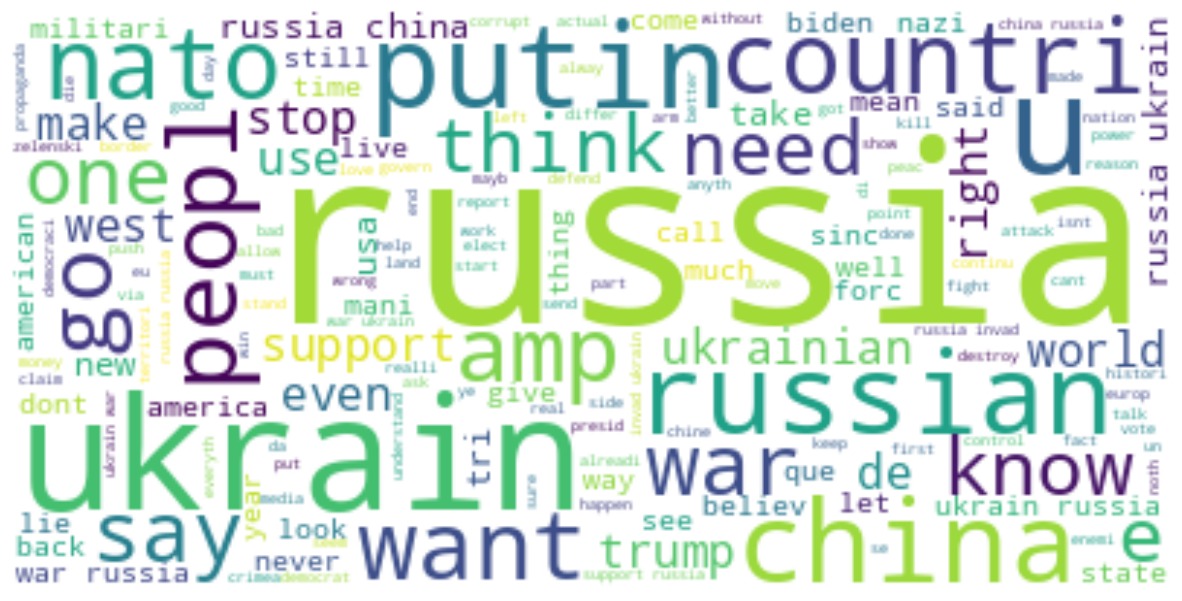

In [9]:
text = "".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.figure( figsize = (15, 15) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
nltk.download("vader_lexicon", quiet = True)

True

In [13]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data.tweet]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data.tweet]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data.tweet]

In [14]:
data.sample(10)

,username,tweet,language,Positive,Negative,Neutra,Neutral
903,ginzo1989,noelreport slaughter would phyrric victori ru...,en,0.181,0.189,0.630,0.630
481,fabiulknows,wiemkenedo rodsterylaki russia siberiantim mo...,qme,0.000,0.000,1.000,1.000
1494,poetentiate,urjantti maksnafofella ukrainian occupi territ...,en,0.162,0.298,0.540,0.540
2223,dankdudebruh,ellymelli nytim hey bud trump collud russia h...,en,0.085,0.000,0.915,0.915
2184,hecatian,repmarkwalk benefit usa war russia china also ...,en,0.169,0.438,0.393,0.393
1863,woodchucky1,marthaaliciamd ruinwander pmviktororban defend...,en,0.000,0.000,1.000,1.000
6168,dragon_bruin,fpwellman media connect plot russia fox right ...,en,0.000,0.000,1.000,1.000
9201,godgavusscience,regard ohio biden f govern repres russia ad...,en,0.000,0.128,0.872,0.872
6739,theartfuldeejay,wive tour scandinavia head russia moregentlem...,en,0.000,0.000,1.000,1.000
9902,jadenisback,dunlaingrob mfarussia also england still inces...,en,0.000,0.000,1.000,1.000


In [15]:
x = sum(data["Positive"])
y = sum(data["Neutral"])
z = sum(data["Negative"])

def score(a, b, c):
    if a > b and a > c:
        return "Positive !"
    elif b > a and b > c:
        return "Neutral !"
    else:
        return "Negative !"

score(x, y, z)

'Neutral !'

In [16]:
print(f"Positive: {x}")
print(f"Negative: {z}")
print(f"Neutral : {y}")

Positive: 994.1580000000002
Negative: 1306.4519999999961
Neutral : 7703.411999999976
